100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 642.52it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -13.23846439  -12.43575788  -14.15296673  -13.23906418]
 [ -12.57393284  -11.68265846  -13.26272108  -13.40416663]
 [ -11.73743793  -10.88639791  -12.73441871  -12.67589973]
 [ -10.91102581  -10.01770791  -11.93845494  -11.85605729]
 [ -10.11259282   -9.19693638  -10.94258346  -11.06042397]
 [  -9.26679856   -8.35466765  -10.80563635  -10.22592345]
 [  -8.39601688   -7.49578496   -9.24642378   -9.49581423]
 [  -7.50973504   -6.63287799   -8.4669939    -8.56588987]
 [  -6.65261657   -5.75885582   -7.61019498   -7.84330743]
 [  -5.77129954   -4.84801643   -5.45061648   -6.86452227]
 [  -4.85555309   -3.89993022   -4.11386078   -5.94998607]
 [  -3.89451461   -3.94887767   -2.9404       -5.04558289]
 [ -13.19524292  -13.57141373  -14.88008092  -13.93302342]
 [ -12.42240188  -15.41849597  -24.80989156  -17.61480255]
 [ -11.72363369  -15.34049731  -22.55384561  -18.69584821]
 [ -10.91905824  -16.03713897  -21.47023865  -17.44949866]
 [ -10.05103974  -1

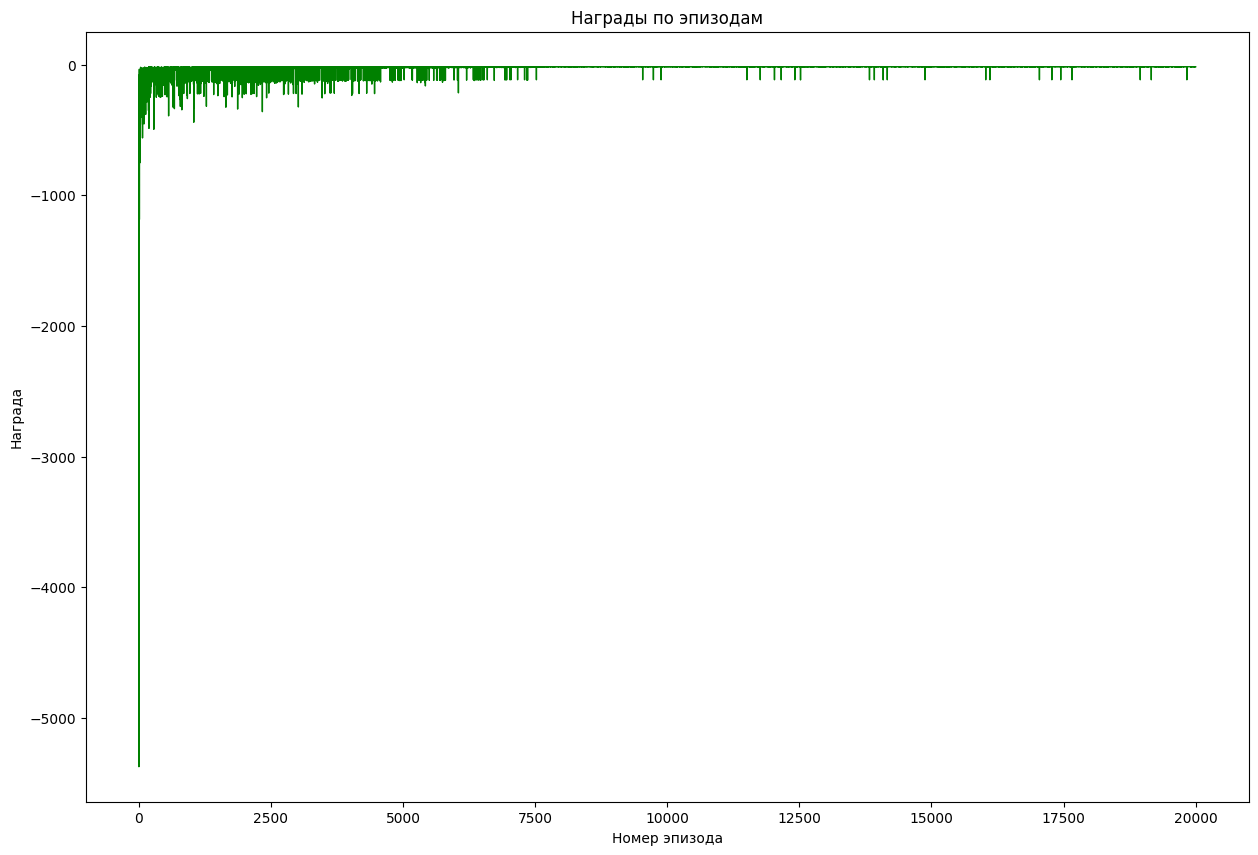

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

# ************************************ БАЗОВЫЙ АГЕНТ *****************************************

class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state 


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:
            
            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass

# ************************************ SARSA *****************************************

class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state) 

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие 
                next_action = self.make_action(next_state) 
                
                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

# ************************************ Q-обучение *****************************************

class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

# ************************************ Двойное Q-обучение *****************************************

class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)


    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)


    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)


def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def run_sarsa():
    env = gym.make('CliffWalking-v0')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_double_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def main():
    run_sarsa()


if __name__ == '__main__':
    main()

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:17<00:00, 1138.08it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ -12.65068321  -12.31234588  -12.31286591  -12.77198199]
 [ -12.15372748  -11.54873869  -11.5487351   -12.81217421]
 [ -11.44006738  -10.76414741  -10.76414828  -12.18884749]
 [ -10.70446606   -9.96342994   -9.96342987  -11.40312183]
 [  -9.90661774   -9.14635925   -9.14635928  -10.73306004]
 [  -9.12623288   -8.31261184   -8.31261184   -9.9453808 ]
 [  -8.29377416   -7.46184886   -7.46184886   -9.11819485]
 [  -7.45824465   -6.59372334   -6.59372334   -8.29251683]
 [  -6.59061771   -5.70788096   -5.70788096   -7.44456287]
 [  -5.70257285   -4.80396016   -4.80396016   -6.55977764]
 [  -4.79371978   -3.881592     -3.881592     -5.66728606]
 [  -3.87602897   -3.86803556   -2.9404       -4.74403622]
 [ -13.05834732  -11.54888054  -11.54888054  -12.3178789 ]
 [ -12.31751736  -10.76416381  -10.76416381  -12.31790193]
 [ -11.54882497   -9.96343246   -9.96343246  -11.54888047]
 [ -10.76415106   -9.14635966   -9.14635966  -10.7641638 ]
 [  -9.9634296

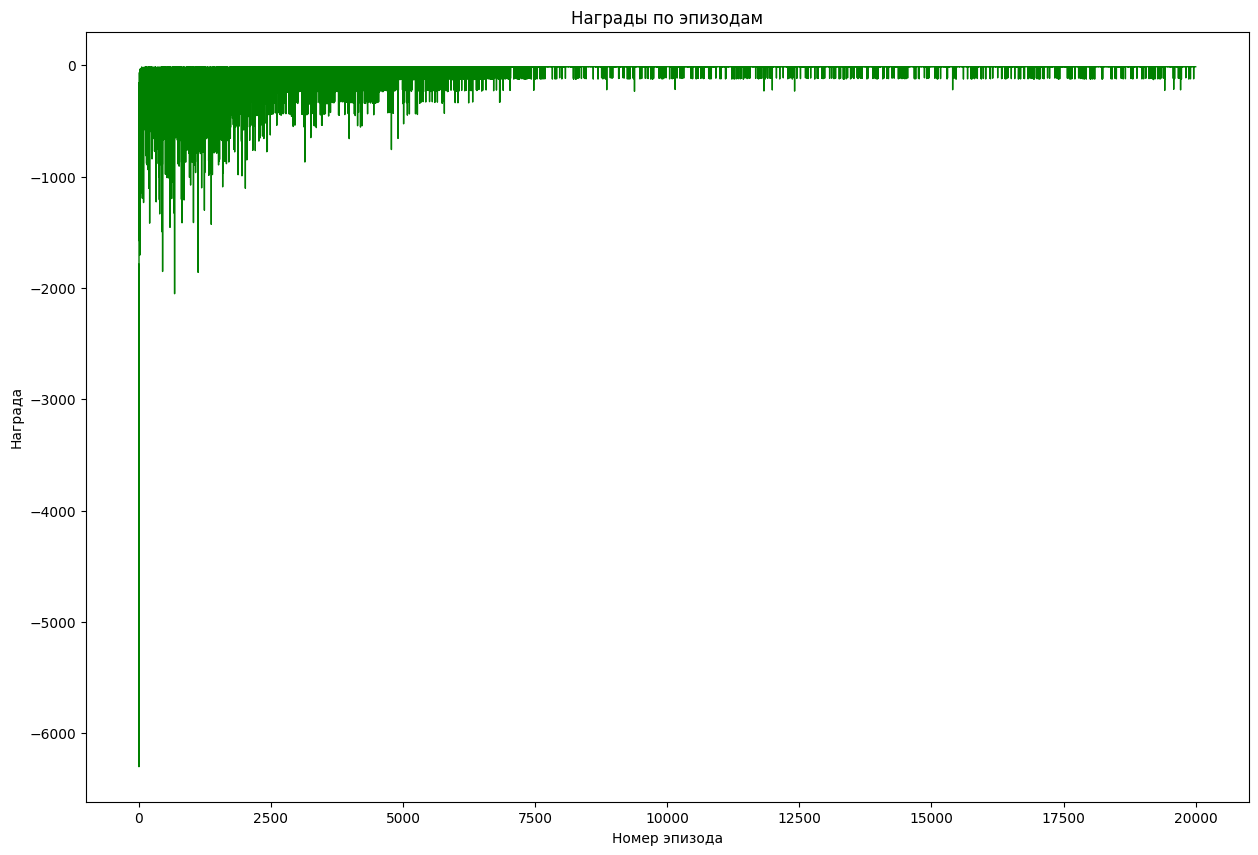

In [2]:
run_q_learning()

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:15<00:00, 1285.18it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ -15.60781804  -12.35266695  -15.83234315  -15.56014015]
 [ -13.5529045   -13.09383122  -11.54891015  -15.2822    ]
 [ -13.24337513  -14.03509962  -10.78238258  -14.83734687]
 [ -13.33181932  -12.87054631  -10.02730659  -13.91111558]
 [ -12.97315235  -13.60262992   -9.22331449  -13.96861097]
 [ -12.11686501   -8.49146935  -10.52111723  -12.06556619]
 [ -10.39742612   -7.46698675   -9.3077384   -11.88122483]
 [  -8.70100024   -6.59374574   -8.86690137   -9.49424252]
 [  -7.14870831   -6.39171162   -5.70788097   -7.74935789]
 [  -6.92101376   -4.88107944   -7.68493878   -7.69182621]
 [  -6.51823412   -3.88215417   -4.14771291   -6.35954566]
 [  -4.41629459   -4.39046445   -2.94040966   -5.29087703]
 [ -13.15337152  -11.54888054  -11.58339152  -12.3353402 ]
 [ -12.32117573  -10.76476382  -10.76416381  -12.31813641]
 [ -11.6398431    -9.99069351   -9.96343246  -11.56368534]
 [ -11.09178853   -9.28441097   -9.14635966  -10.80440075]
 [ -

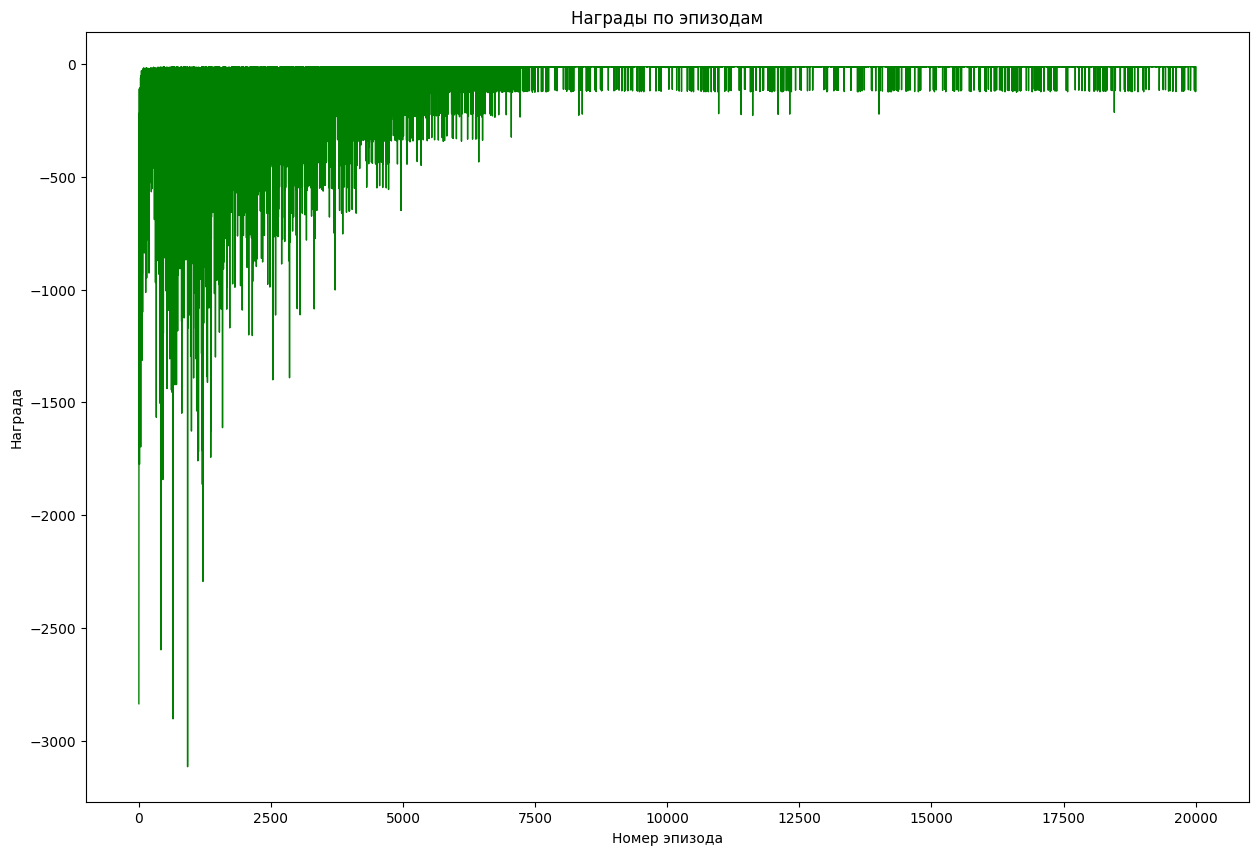

In [3]:
run_double_q_learning()